# Model selection and data splitting techniques

## Data splitting techniques

### [Hold-out cross-validation][1]

Split the data randomly into training, validation/development, and test/unseen parts randomly: usually 60%, 20%, and 20% respectively or any other splitting techniques:
1. Training set: Data set to build the model.
2. Validation/development set: Data set to evaluate the learning algorithm with different configurations. It is called development set, since we are using it while developing our model. It can be a bit biased, that's why we need the third kind of data set.
3. Test/unseen set: Data set to check the accuracy of the final model and get the unbiased results.

#### <span style="color:blue"> Hold-out cross-validation: Notes</span>
1. It is a simple algorithm but we could not use it to prove model generalization.

### [K-fold cross-validation][2]

We usually split the data into K=10 folds such that: 
1. for each fold i where i = 1,2,...K, do:
    1. train the learner on all folds except i.
    2. Use the ith fold for testing the model in (1) and report the performance results.
2. Average the model performance results in the K iterations in step (1)

#### <span style="color:blue"> K-fold cross-validation: Notes</span>
1. It is an in-place and computaionally doable algorithm but we could use it to prove model generalization on the population.

<img style="float: center" src="./images/Kfold-cross-validation.jpg" alt="drawing" Hight="300" width="500"/> 


### [Bootstrapping cross-validation][3]


1. Choose a number of bootstrap samples to perform. //Usually 100,200,..., or 1000 repetitions 
2. Choose a sample size. // Usually a sample size = the size of population.
3. For each bootstrap sample:
   1. Randomly draw a sample with replacement (in-the-bag training sample) with the chosen size:
       - While the size of the sample is less than the chosen size:
            - Randomly select an observation from the dataset
            - Add it to the sample (i.e., In-the-bag training sample).
   2. Fit a model on the data sample
   3. Estimate the model performance on the remaining unselected observations (the out-of-bag sample).
4. Calculate the average of the model performance results in all bootstrap samples in step (3).


#### <span style="color:blue"> Bootstrapping: Notes</span>
1. We use [0.632 bootstrap rule][4] in which the in-the-bag sample has 63.2% distinct observations and the out-the-bag sample has the remaining 38.8% observations.
2. It is a computationally extensive and out-of-place algorithm and we could use it to prove model generalization on the simulated population.


<img style="float: center" src="./images/Bootstrap-example.jpg" alt="drawing" Hight="100" width="300"/> 


[1]: https://www.mff.cuni.cz/veda/konference/wds/proc/pdf10/WDS10_105_i1_Reitermanova.pdf
[2]: https://en.wikipedia.org/wiki/Cross-validation_(statistics)
[3]:https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
[4]:http://rasbt.github.io/mlxtend/user_guide/evaluate/bootstrap_point632_score/



#### More References:
[Ref-1](https://www.oreilly.com/ideas/evaluating-machine-learning-models/page/4/offline-evaluation-mechanisms-hold-out-validation-cross-validation-and-bootstrapping)

[Ref-2](https://link.springer.com/referenceworkentry/10.1007%2F978-1-4419-9863-7_644)




In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

np.random.seed(0)  # For reproducibility

In [2]:
iris = pd.read_csv("~/DATA/Iris.csv")  # Load the data
X = iris[iris.columns[1:5]]
y = iris[iris.columns[5]]

In [3]:
X.shape,y.shape

((150, 4), (150,))

In [4]:
#Hold-out cross-validation

from sklearn.model_selection import train_test_split,KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [5]:
#10-fold cross-validation

#X=np.array(X)
#y=np.array(y)
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    #X_train,X_test, y_train, y_test = X[train_index],X[test_index], y[train_index], y[test_index]

Train Index:  [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149] 

Test Index:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 

In [6]:
# Bootstrapping cross-validation

from sklearn.utils import resample

Index=range(0,len(X))

boot = resample(Index, replace=True, n_samples=len(X), random_state=1)
print(len(set(boot))/len(X)*100.0)

print('\nBootstrap Sample: %s' % boot)
# out of bag observations
oob = [x for x in Index if x not in boot]
print('OOB Sample: %s' % oob)
print(len(oob)/len(X)*100.0)

62.0

Bootstrap Sample: [37, 140, 72, 137, 133, 79, 144, 129, 71, 134, 25, 20, 101, 146, 139, 142, 50, 68, 96, 86, 141, 137, 7, 63, 61, 22, 57, 1, 128, 60, 8, 141, 115, 121, 30, 71, 131, 149, 49, 57, 3, 24, 43, 76, 26, 52, 80, 109, 115, 41, 15, 64, 25, 111, 135, 26, 104, 22, 9, 126, 23, 125, 100, 57, 83, 136, 32, 10, 23, 143, 87, 25, 92, 74, 46, 65, 113, 77, 3, 128, 6, 52, 2, 76, 149, 7, 77, 75, 76, 43, 20, 30, 36, 103, 7, 45, 57, 96, 13, 10, 23, 124, 81, 135, 121, 148, 140, 94, 60, 82, 115, 97, 130, 103, 98, 10, 96, 82, 71, 54, 15, 133, 145, 20, 118, 22, 141, 114, 97, 84, 10, 96, 61, 56, 149, 96, 25, 142, 141, 116, 43, 134, 143, 24, 137, 53, 69, 101, 21, 40]
OOB Sample: [0, 4, 5, 11, 12, 14, 16, 17, 18, 19, 27, 28, 29, 31, 33, 34, 35, 38, 39, 42, 44, 47, 48, 51, 55, 58, 59, 62, 66, 67, 70, 73, 78, 85, 88, 89, 90, 91, 93, 95, 99, 102, 105, 106, 107, 108, 110, 112, 117, 119, 120, 122, 123, 127, 132, 138, 147]
38.0


### <span style="color:brown"><b> Exercise </b> </span>
**When to use:**
1. Hold-out
2. K-fold
3. Bootrapping

### <span style="color:brown"><b> More about overfitting and underfitting </b> </span>
1. [Overfitting and underfitting.][1]


[1]: https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

### <span style="color:brown"><b> In assignment-1 </b> </span>
**You will ask to implement the following two techniques without using any sklearn or any python ready-made package-- just loops: on list of 100 integer numbers**
1. K-fold
2. Bootrapping


# Model selection and generalization error

## [Bias and varience  trade-off][1]



1. Bias is the difference between the average prediction of our model and the correct value which we are trying to predict.
   - High Bias leads to model underfitting – too general to identify specific detailed data patterns.
   - High Bias is due to using simpler model like linear vs. quadratic -- Wrong assumptions.
   - Solutions:
      - Introduce new features.
      - Use other tecnhiques.  
2. Variance is the variability of model prediction for a given data point or a value.
   - High Variance leads to model overfitting – too specific and very sensitive to data variations, noise and outliers.
   - High Variance is due to using models with high degree of freedoms like high-degree polynomial -- Wrong assumptions.
   - Solutions:
      - Increase the number of examples.
      - Reduce the variability of feature values using data preprocessing techniques.
      - Use other tecnhiques.
      
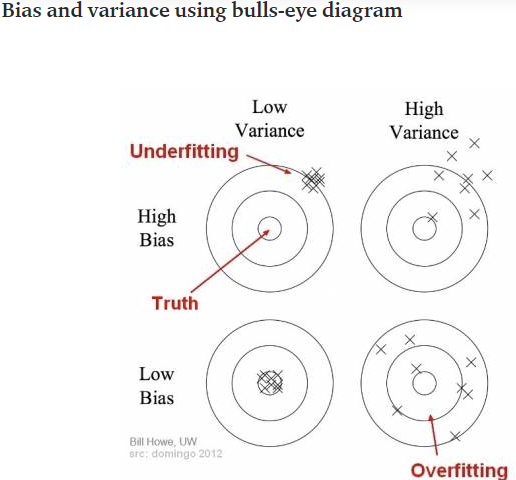


__We aim to reduce the generalization error__ In the equation of $Generalization\;Error=Bias^2+Variance+Irreducible\;Noise$

- Where Irreducible Noise:
    - Is the data noise.
    - Cannot be reduced regardless the model performance.
    - Can be reduced only by cleaning up the data.

[__The mathematical interpretation and the optimal balance__  ][1]



### Model selection based on minimal generalization error

<img style="float: center" src="./images/Model-complexity.png" alt="drawing" Hight="300" width="500"/>


[1]: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229




# Classification Evaluation Metrics

<img style="float: center" src="./images/Supervised-metrics.png" alt="drawing" Hight="600" width="900"/>

[ROC and AUC Reference](http://gim.unmc.edu/dxtests/roc3.htm)

[Supervised metrics](https://en.wikipedia.org/wiki/Precision_and_recall)


### <span style="color:brown"><b> Exercise </b> </span>

**Given the following table**

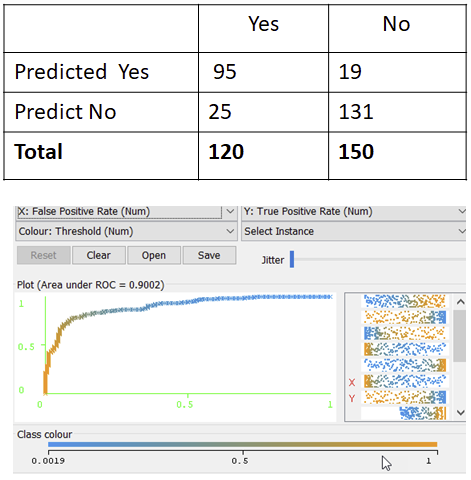

**What are the values of PPV and NPV?**

**What are the relationship among precision, PPV, and NPV?**

**What are the best values for the metrics?**

# Other Evaluation Metrics

<img style="float: center" src="./images/Other-metrics.png" alt="drawing" Hight="500" width="800"/>

# [Log Loss Function:][1]

1. __Accuracy__ is the count of predictions where your predicted value equals the actual value. Accuracy is not always a good indicator because of its yes or no nature.
2. __Log Loss__ takes into account the uncertainty of your prediction based on how much it varies from the actual label. This gives us a more nuanced view into the performance of our model.

**In binary classification**

<center> $Log Loss= -ylog(p)+(1-y)log(1-p)$ </center>

**In multi-class classification (M > 2)**

<center> $Log Loss= \sum_{c=1}^{M}y_{o,c}log(p_{o,c})$ </center>


[1]:http://wiki.fast.ai/index.php/Log_Loss



# Precision/Recall Tradeoff Threshold

**Consider we have 6 postives and 8 negatives**

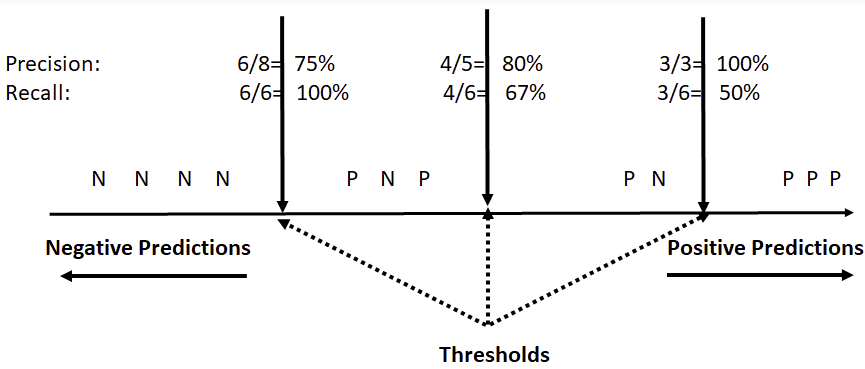

### <span style="color:brown"><b> In assignment-2 </b> </span>
**You will ask to implement the classification metrics without using any sklearn or any python ready-made package-- The input will be a confusion matrix**
